<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/2_PlantillaProyecto_EjRegresionGH/Reg_sinc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejemplo mínimos cuadrados para regresión

sklearn.linear model.LinearRegression

Regresor lineal por mínimos cuadrados

\begin{equation}
\omega^* = \arg\min_\omega \|y-Xw\|^2_2
\end{equation}


sklearn.kernel ridge.KernelRidge

Regresor rígido kernel



\begin{equation}
\omega^* = \arg\min_\omega \|y-\Phi \omega\|^2_2 + \alpha\|\omega\|^2_2
\end{equation}

\begin{equation}
\omega^* = (\Phi^\top \Phi+\alpha I)^{-1}\Phi^\top y
\end{equation}


\begin{equation}
\omega^* = \Phi^\top(\Phi \Phi^\top+\alpha I)^{-1}y = k^\top(K+\alpha I)^{-1}y
\end{equation}


Suposición sobre el ruído y los parámetros del modelo (demostrar):

\begin{equation}
\eta \sim \mathcal{N}\left(\eta|\mu_\eta,\sigma^2\right)
\end{equation}





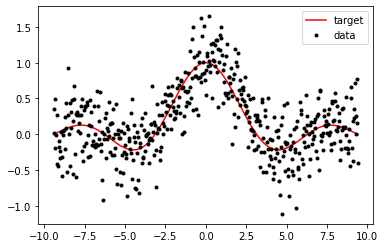

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
N = 500
X = np.linspace(-3*np.pi,3*np.pi,N)
y = np.sinc(X/np.pi)
var = 0.1
mue = 0
noise = mue + np.sqrt(var)*np.random.randn(X.shape[0])
yn = y + noise
plt.plot(X,y,'r',label='target' )
plt.plot(X,yn,'k.',label='data')
plt.legend()

In [ ]:
ydata = yn.reshape(-1,1)
Xdata = X.reshape(-1,1)
print(Xdata.shape) # N = 500 muestras, P = 1 atributos
print(ydata.shape) # N = 500, regresion univarida

(500, 1)
(500, 1)


(350, 1)
(150, 1)


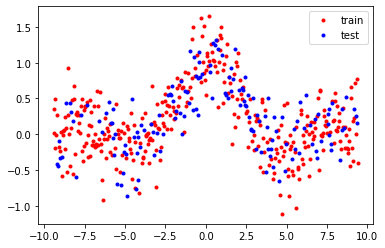

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata,
                                                    test_size=0.3)

print(X_train.shape)
print(X_test.shape)

plt.plot(X_train,y_train,'r.',label='train' )
plt.plot(X_test,y_test,'b.',label='test')
plt.legend()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
#reg = LinearRegression() # construyendo el objeto
gamma = 1e-1
alpha = 100
reg = KernelRidge(kernel='rbf',gamma=gamma, alpha = alpha)
reg.fit(X_train,y_train) #ajustar solo sobre train
#prediccion
y_test_e = reg.predict(X_test)
y_train_e = reg.predict(X_train)



In [ ]:
steps=[('reg', KernelRidge(kernel = 'rbf'))]
parameters = {'reg__alpha' : [0,1e-3,1e-2,0.1,1,10,100,1000],              
              'reg__gamma': [1e-4,1e-3,1e-2,0.1,1,10,100,1000],
              #'reg__kernel': ['rbf','poly'],
              }

pipeline = Pipeline(steps = steps)

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4,cv=5,
                           scoring='neg_mean_absolute_error',verbose=10)

grid_search.fit(X_train, y_train)
#mejor modelo entrenado
best_model = grid_search.best_estimator_

print("\nMejores parámetros:\n")
print(grid_search.best_params_)





Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0367s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1126s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1920s.) Setting batch_size=8.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 200 tasks      | elapsed:    1.6s



Mejores parámetros:

{'reg__alpha': 1, 'reg__gamma': 0.1}


[Parallel(n_jobs=4)]: Done 288 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 320 out of 320 | elapsed:    2.2s finished


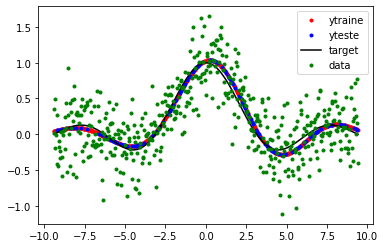

In [ ]:
y_test_e = grid_search.best_estimator_.predict(X_test)
y_train_e = grid_search.best_estimator_.predict(X_train)
plt.plot(X_train,y_train_e,'r.',label='ytraine' )
plt.plot(X_test,y_test_e,'b.',label='yteste')
plt.plot(X,y,'k',label='target' )
plt.plot(Xdata,ydata,'g.',label='data' )
plt.legend()

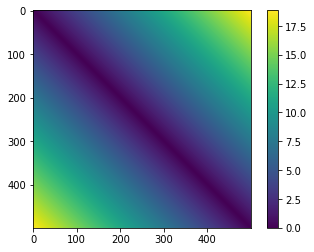

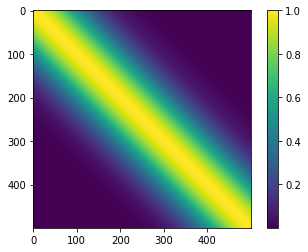

In [ ]:
from sklearn.metrics import pairwise_distances as dist

D = dist(X.reshape(-1,1),X.reshape(-1,1)) #disimilitud

K = np.exp(-.5*gamma*D**2)
D.shape
plt.imshow(D)
plt.colorbar()
plt.show()


plt.imshow(K)
plt.colorbar()
plt.show()

\begin{equation}
\kappa(x,x') = \frac{1}{\sqrt{2\pi \sigma^2}}\exp\left(\frac{-\|x-x'\|_2^2}{2\sigma^2}\right) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp\left(\frac{-\gamma\|x-x'\|_2^2}{2}\right) 
\end{equation}